In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import math
sns.set(rc={'figure.figsize':(11,8)})

In [33]:
# READ THE DATASET AND CREATE A DATAFRAME
df = pd.read_csv("../dataset/song_data.csv")

In [34]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [35]:
# WE CAN SEE THAT THE DATA HAVE A DIFFERENT ORDER OF MAGNITUDE AND SOME OUTLIERS
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [36]:
# THE TYPE OF DATA IS OK
# NOT EXISTS MISSING DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [37]:
# NOT EXISTS NULL 
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [38]:
# WE CAN SEE THAT EXISTS 3 CATEGORICAL VALUES, audio_mode, time_signature, and key
# THE REST IS NUMERICAL VALUES
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

In [39]:
# REMOVE THE song_name, THIS FEATURE NOT IS IMPORTANT
df = df.drop("song_name", axis=1)

In [45]:
# SEPARATE TARGET DATA
# target = df["song_popularity"]
# df = df.drop("song_popularity", axis=1).reset_index(drop=True)

# SEPARETE CATEGORICAL AND NUMERICAL VALUES
cat_features = df.loc[:, df.nunique().sort_values() <= 12].columns
num_features = df.loc[:, ~(df.nunique().sort_values() <= 12)].columns

In [41]:
# EXISTS SOME DUPLICATED VALUES LETS DROP THEN
df.duplicated().sum()

3911

In [42]:
df = df.drop_duplicates()

<AxesSubplot:xlabel='song_popularity', ylabel='Count'>

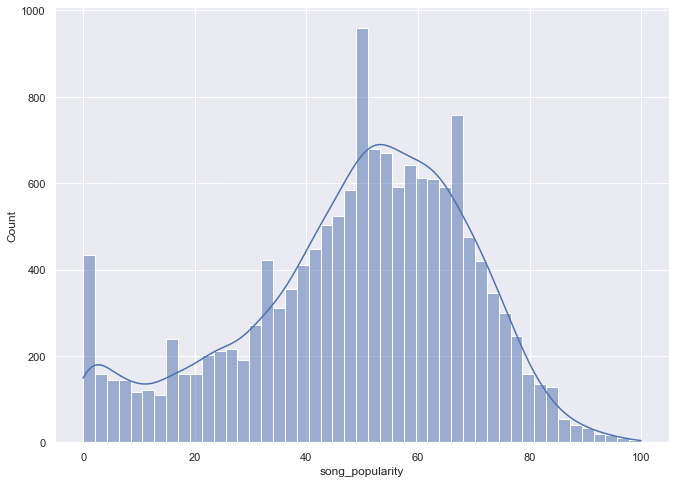

In [46]:
# PLOTING TARGET FEATURES
sns.histplot(df["song_popularity"],kde=True)

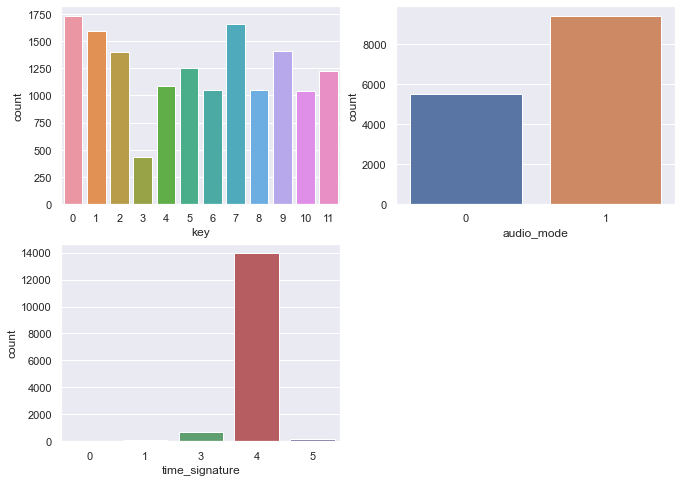

In [47]:
# CATEGORICAL PLOT
size = len(cat_features)
n_cols = 2

n_rows = size // n_cols
rest   = size % n_cols

for i in range(len(cat_features)):
    plt.subplot(n_rows+rest, n_cols, i+1)
    sns.countplot(data=df, x=cat_features[i])

In [48]:
def plotBox(data, features):
    size = len(features)
    n_cols = 5

    n_rows = size // n_cols
    rest   = math.ceil((size % n_cols) / n_cols)

    fig, axes = plt.subplots(n_rows+rest, n_cols, figsize=(20, 8))
    axes = axes.ravel()

    for ax, feature in zip(axes, features):
        sns.boxplot(data=data[feature], ax=ax, color=np.random.randint([255,255,255])/255)
        ax.set_xlabel(feature)

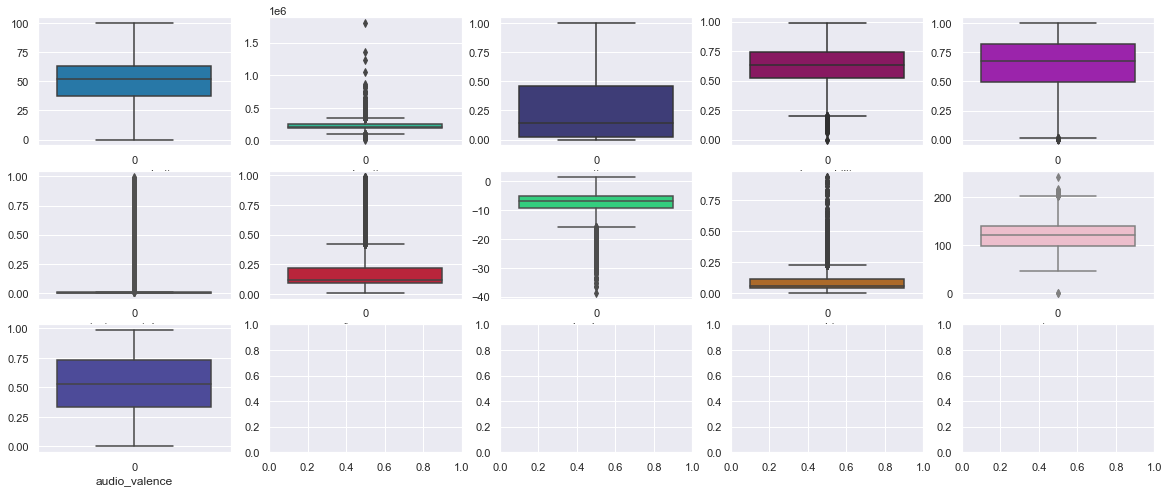

In [49]:
plotBox(df, num_features)

In [50]:
# WE SEE THAT EXISTS OUTLIERS AND THE FEATURE
# REMOTE OUTLIERS
def getOutliers(data):
    q1, q3 = np.quantile(data, [0.25, 0.75])
    iqr = q3 - q1
    
    r1 = q1 - (1.5*iqr)
    r2 = q3 + (1.5*iqr)
    
    return (r1, r2)

In [51]:
for feature in num_features:
    r1, r2 = getOutliers(df[feature])
    df_clean = df[(df[feature] >= r1) & (df[feature] <= r2)]
    
df_clean = df_clean.reset_index(drop=True)

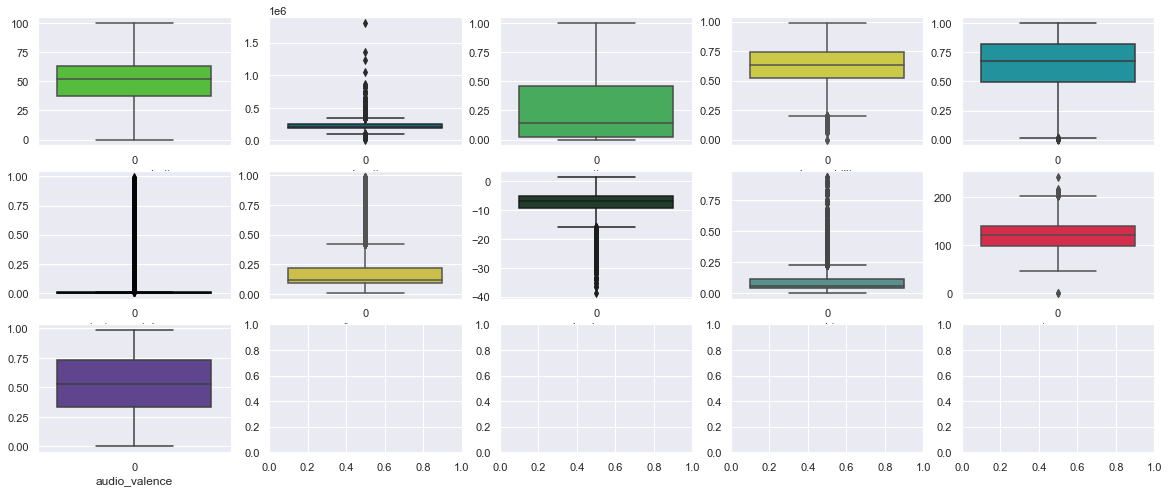

In [52]:
# NOW IS BETTER
# instrumentalness SEE STRANGE YET, YOUR RANGE OF VALUES SMALL, MAYBE I WILL REMOVE THIS FEATURE.
plotBox(df_clean, num_features)

In [53]:
# ONE HOT ENCODE
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean["key"], drop_first=True, prefix=str("key"))], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean["audio_mode"], drop_first=True, prefix=str("audio_mode"))], axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean["time_signature"], drop_first=True, prefix=str("time_signature"))], axis=1)


In [54]:
# DROP OLD FEATURES
df_clean = df_clean.drop("key", axis=1)
df_clean = df_clean.drop("audio_mode", axis=1)
df_clean = df_clean.drop("time_signature", axis=1)

In [55]:
df_clean.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'audio_valence', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'audio_mode_1',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [56]:
# TRAIN TEST SPLIT
y = df_clean.iloc[:, df_clean.columns == "song_popularity"]
X = df_clean.iloc[:, df_clean.columns != "song_popularity"]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
print(f"\033[1mTrain Size:\033[0m {X_Train.shape[0]/df_clean.shape[0] * 100}%")
print(f"\033[1mTest Size:\033[0m {X_Test.shape[0]/df_clean.shape[0] * 100}%")

Train Size: 75.0%
Test Size: 25.0%


In [58]:
# STANDARD SCALER
std_s = StandardScaler()
std_s.fit(X_Train)

X_Train_std = pd.DataFrame(std_s.transform(X_Train), columns=X_Train.columns)
X_Test_std = pd.DataFrame(std_s.transform(X_Test), columns=X_Test.columns)

In [59]:
X_Train_std.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_7,key_8,key_9,key_10,key_11,audio_mode_1,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,-0.048468,-0.248458,1.267986,-0.329465,-0.384638,1.186537,-0.752741,2.008121,-0.752818,0.507740,...,-0.353926,-0.275759,-0.325115,3.614078,-0.294984,-1.305479,-0.072172,-0.218718,0.262199,-0.116153
1,1.057771,0.256559,-2.081776,-1.757041,-0.384331,-0.200630,-1.279274,-0.683781,0.692613,-0.902109,...,-0.353926,-0.275759,-0.325115,-0.276696,-0.294984,0.766002,-0.072172,-0.218718,0.262199,-0.116153
2,-0.567066,0.671275,-0.109841,1.044070,-0.384638,-0.611340,0.943096,-0.010089,0.191516,0.225770,...,-0.353926,-0.275759,-0.325115,-0.276696,-0.294984,-1.305479,-0.072172,-0.218718,0.262199,-0.116153
3,0.192315,0.089335,-0.305770,0.458628,-0.384638,-0.268628,0.957935,-0.475462,0.241921,0.217714,...,-0.353926,-0.275759,-0.325115,-0.276696,-0.294984,-1.305479,-0.072172,-0.218718,0.262199,-0.116153
4,-0.208801,0.584319,0.901408,-1.000471,-0.361383,1.043741,-0.628836,-0.482151,-0.792160,-0.442901,...,-0.353926,-0.275759,3.075833,-0.276696,-0.294984,-1.305479,-0.072172,-0.218718,0.262199,-0.116153


In [60]:
np.random.choice(X_Train_std.loc[:,X_Train_std.nunique()>=50].columns.values,3,replace=False)

array(['speechiness', 'song_duration_ms', 'liveness'], dtype=object)

In [246]:
#1. Linear Regression
#2. Logistic Regression
#3. Polynomial Regression *
#4. Ridge Regression
#5. Lasso Regression
#6. Quantile Regression * 
#7. Bayesian Linear Regression *
#8. Principal Components Regression **
#9. Partial Least Squares Regression **
#10. Elastic Net Regression
#11. XGBoost
#12. GradientBoostingRegressor
#13. lightgbm
#14. CatBoost
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [247]:
from sklearn.linear_model import LinearRegression, LogisticRegression, ridge_regression, lasso_path, BayesianRidge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [201]:
def plotEval(y_pred, y_hat, title):
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot((y_hat - y_pred), kde=True)
    plt.title(f"Error Distribution {title}")
    plt.xlabel("Error")
    
    plt.subplot(1,2,2)
    plt.scatter(y_hat, y_pred)
    plt.plot([y_hat.min(), y_hat.max()], [y_hat.min(), y_hat.max()], "r--")
    plt.title(f"y_hat x y_pred {title}")
    plt.xlabel("y_pred")
    plt.ylabel("y_hat")
    
    plt.show()
    


def Evaluate(model, X_Train, Y_Train, X_Test, Y_Test):
    model.fit(X_Train, Y_Train)
    y_pred = model.predict(X_Test)
    y_pred_train = model.predict(X_Train)    
    
    result_test  = []
    result_train = []    
    
    mse_test  = mean_squared_error(y_pred, Y_Test)
    rmse_test = np.sqrt(mse_test)
    rss_test  = np.round(np.sum((Y_Test - y_pred.reshape(-1,1))**2), 20)
    r2_test   = r2_score(y_pred, Y_Test)
    mae_test  = mean_absolute_error(y_pred, Y_Test)
    
    mse_train  = mean_squared_error(y_pred_train, Y_Train)
    rmse_train = np.sqrt(mse_train)
    rss_train  = np.round(np.sum((Y_Train - y_pred_train.reshape(-1,1))**2), 20)
    r2_train   = r2_score(y_pred_train, Y_Train)
    mae_train  = mean_absolute_error(y_pred_train, Y_Train)
    
    result_test.append([mse_test, rmse_test, rss_test, r2_test, mae_test])
    result_train.append([mse_train, rmse_train, rss_train, r2_train, mae_train])    

    
    print("----------------------------- Test ----------------------------------\n")
    print(f"Test MSE  => {mse_test}")
    print(f"Test RMSE => {rmse_test}")
    print(f"Test RSS  => {rss_test}")
    print(f"Test R2   => {r2_test}")
    print(f"Test MAE  => {mae_test}\n")
    print("----------------------------- Train ----------------------------------\n")    
    print(f"Train MSE  => {mse_train}")
    print(f"Train RMSE => {rmse_train}")
    print(f"Train RSS  => {rss_train}")
    print(f"Train R2   => {r2_train}")
    print(f"Train MAE  => {mae_train}\n")
    print("-----------------------------------------------------------------------\n")        
    
    plotEval(y_pred, Y_Test, "Test")   
    plotEval(y_pred_train, Y_Train, "Train")       

    
    return (result_test, result_train)
    

LinearRegression
----------------------------- Test ----------------------------------

Test MSE  => 402.4259628509763
Test RMSE => 20.06055739133328
Test RSS  => 5876728309.023173
Test R2   => -39.91507710460561
Test MAE  => 15.979640602782732

----------------------------- Train ----------------------------------

Train MSE  => 406.01797564626725
Train RMSE => 20.149887732845244
Train RSS  => 53447606182.63289
Train R2   => -38.426552027057326
Train MAE  => 16.031333305055824

-----------------------------------------------------------------------



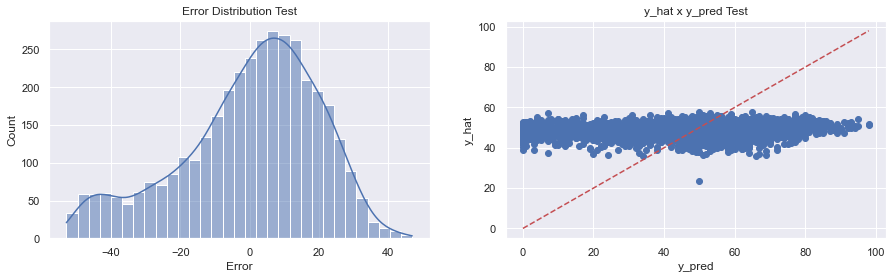

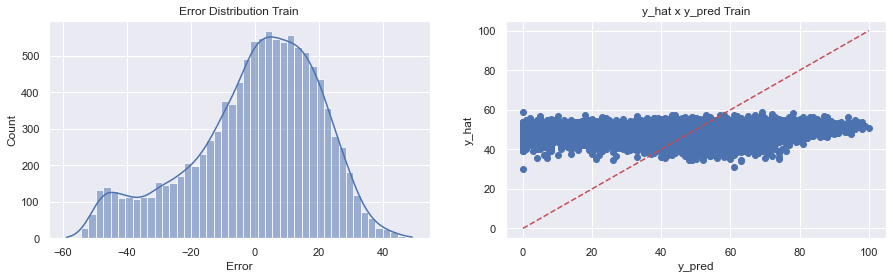

LogisticRegression
----------------------------- Test ----------------------------------

Test MSE  => 577.4264272313053
Test RMSE => 24.029698858523076
Test RSS  => 8733817000
Test R2   => -2.360498218253512
Test MAE  => 18.036451353524523

----------------------------- Train ----------------------------------

Train MSE  => 583.913517376932
Train RMSE => 24.164302542737126
Train RSS  => 78283713546
Train R2   => -2.484024888303206
Train MAE  => 18.125256856964175

-----------------------------------------------------------------------



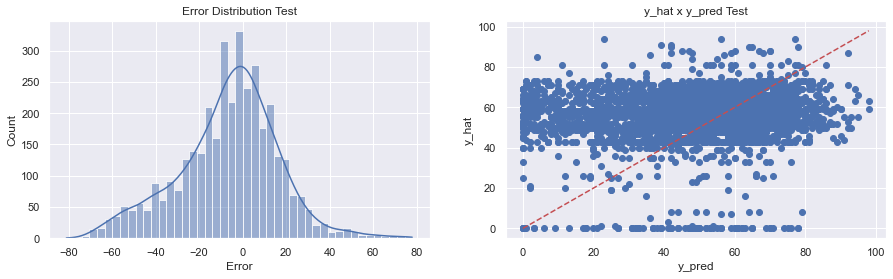

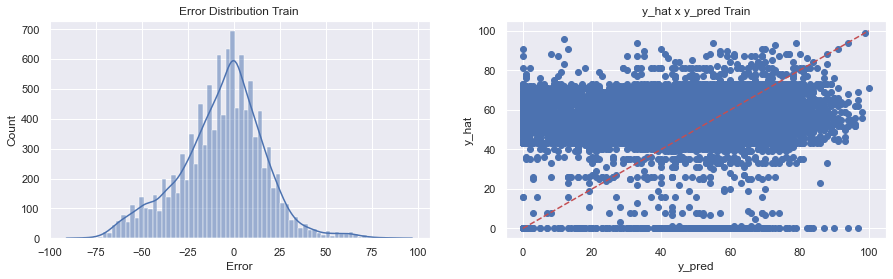

BayesianRidge
----------------------------- Test ----------------------------------

Test MSE  => 402.45165930075996
Test RMSE => 20.061197853088434
Test RSS  => 5851253553.358505
Test R2   => -49.26961948333681
Test MAE  => 15.97962638470384

----------------------------- Train ----------------------------------

Train MSE  => 406.2011041923325
Train RMSE => 20.154431378541357
Train RSS  => 53218276263.97841
Train R2   => -46.97125806355252
Train MAE  => 16.035629091469

-----------------------------------------------------------------------



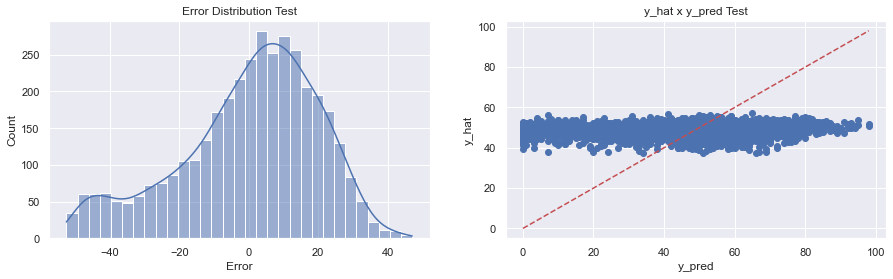

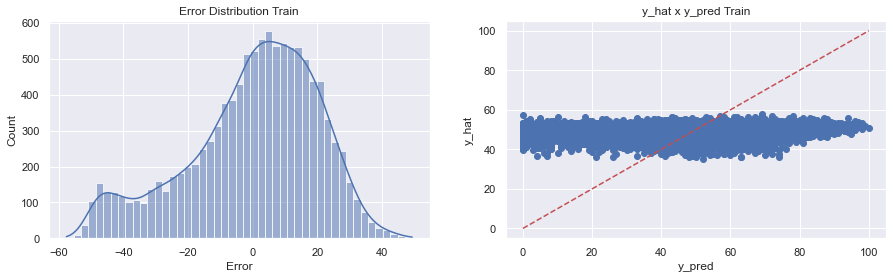

ElasticNet
----------------------------- Test ----------------------------------

Test MSE  => 407.4800720441243
Test RMSE => 20.18613563919861
Test RSS  => 5756534987.598436
Test R2   => -337.98633574923196
Test MAE  => 16.079932092245024

----------------------------- Train ----------------------------------

Train MSE  => 411.47998959282415
Train RMSE => 20.284969548728046
Train RSS  => 52312007805.19421
Train R2   => -332.4961556221466
Train MAE  => 16.144018614203652

-----------------------------------------------------------------------



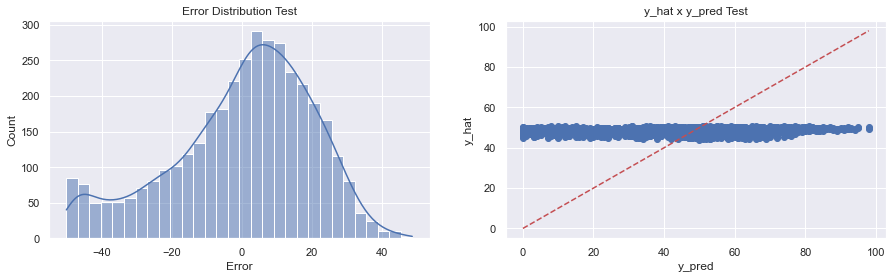

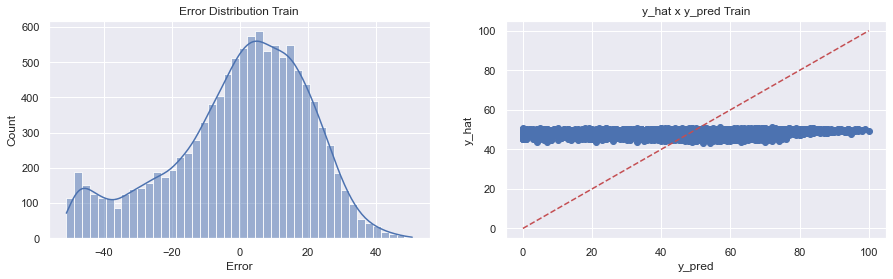

XGBoost
----------------------------- Test ----------------------------------

Test MSE  => 422.511126325534
Test RMSE => 20.5550754395486
Test RSS  => 6784455930.658214
Test R2   => -4.631082611259127
Test MAE  => 16.256001626860517

----------------------------- Train ----------------------------------

Train MSE  => 169.2278298375035
Train RMSE => 13.008759734790381
Train RSS  => 66998341780.87707
Train R2   => -0.42857874500037285
Train MAE  => 9.946983874477842

-----------------------------------------------------------------------



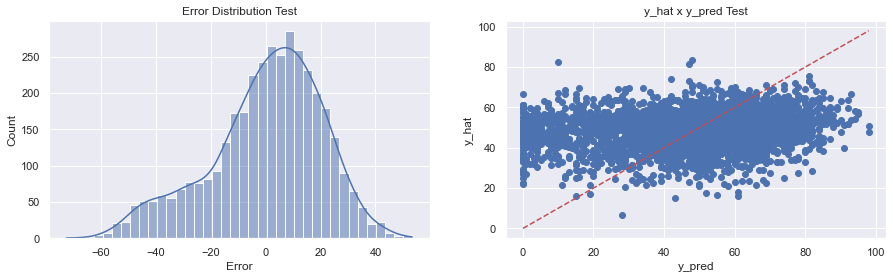

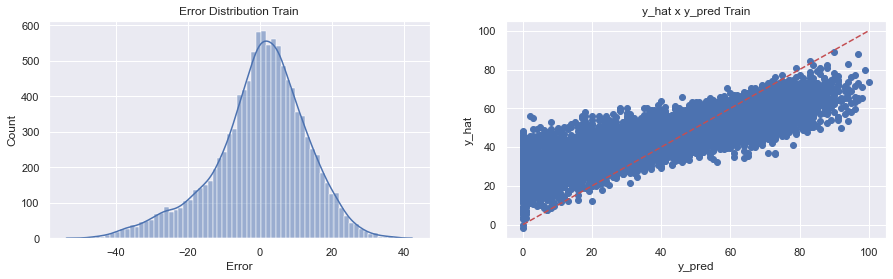

GradientBoostingRegressor
----------------------------- Test ----------------------------------

Test MSE  => 390.75225624202244
Test RMSE => 19.76745447046793
Test RSS  => 6034390218.37472
Test R2   => -17.46440168421535
Test MAE  => 15.696743323835696

----------------------------- Train ----------------------------------

Train MSE  => 369.25055014068715
Train RMSE => 19.21589316531207
Train RSS  => 54915532241.87638
Train R2   => -15.772723459045409
Train MAE  => 15.199227785493383

-----------------------------------------------------------------------



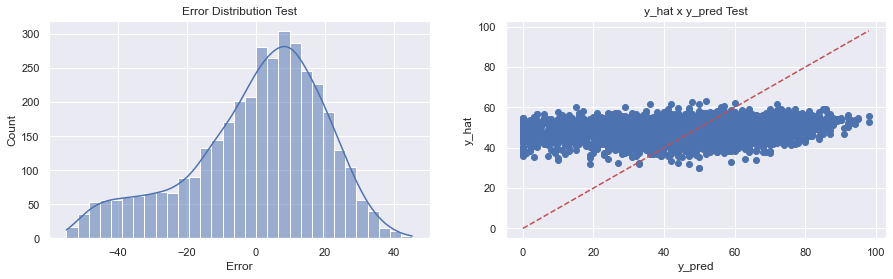

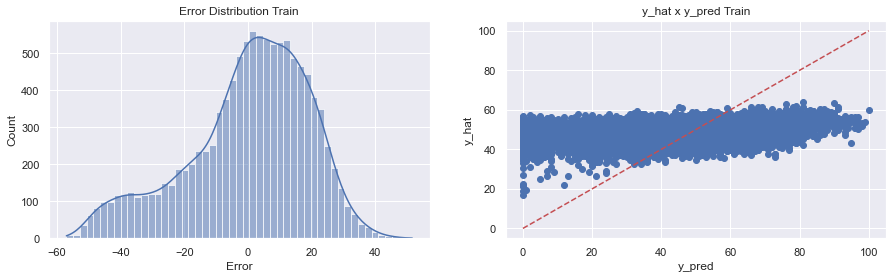

HistGradientBoostingRegressor
----------------------------- Test ----------------------------------

Test MSE  => 387.9524800321171
Test RMSE => 19.696509336228008
Test RSS  => 6148349141.153851
Test R2   => -12.220841415238114
Test MAE  => 15.648164774889779

----------------------------- Train ----------------------------------

Train MSE  => 322.11407423276984
Train RMSE => 17.947536717688305
Train RSS  => 56246339359.32663
Train R2   => -8.870051992191454
Train MAE  => 14.173740240562411

-----------------------------------------------------------------------



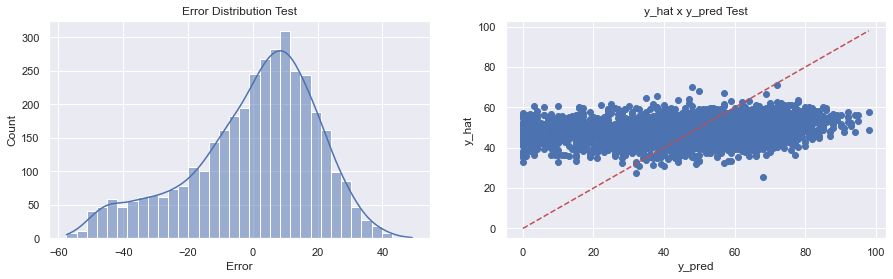

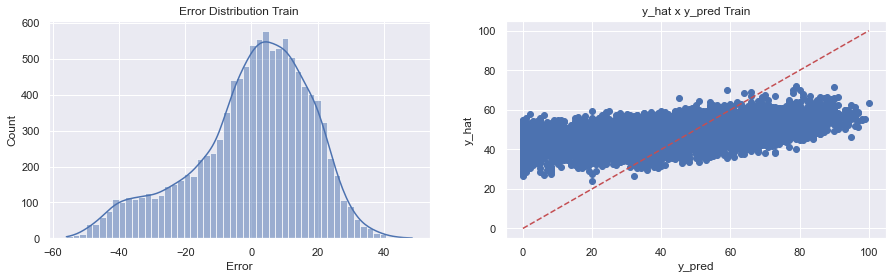

LGBMRegressor
----------------------------- Test ----------------------------------

Test MSE  => 391.60816655483075
Test RMSE => 19.78909211042363
Test RSS  => 6233040939.632187
Test R2   => -10.052750178717703
Test MAE  => 15.65751469757055

----------------------------- Train ----------------------------------

Train MSE  => 284.5389292839667
Train RMSE => 16.868281752566464
Train RSS  => 57667101538.8802
Train R2   => -5.470068609202379
Train MAE  => 13.30168215710195

-----------------------------------------------------------------------



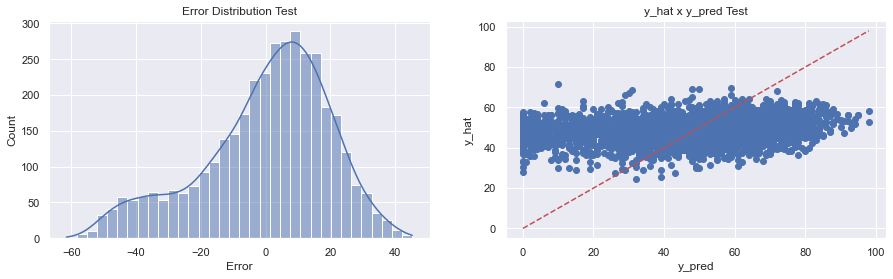

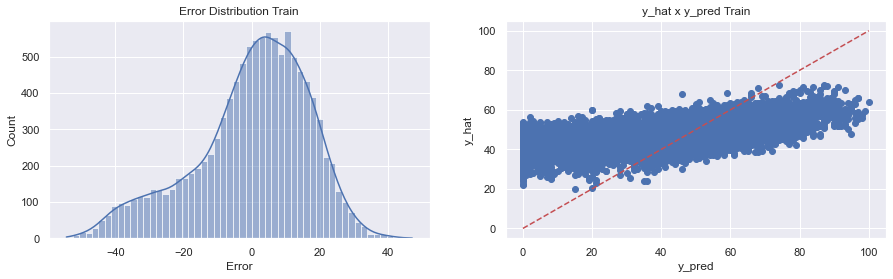

CatBoostRegressor
----------------------------- Test ----------------------------------

Test MSE  => 394.6319150036332
Test RMSE => 19.86534457299025
Test RSS  => 6382425316.920558
Test R2   => -7.5484158000367145
Test MAE  => 15.704838325972476

----------------------------- Train ----------------------------------

Train MSE  => 234.7690566916995
Train RMSE => 15.322175325054191
Train RSS  => 60910326865.64411
Train R2   => -2.3603306608474823
Train MAE  => 11.977305735511115

-----------------------------------------------------------------------



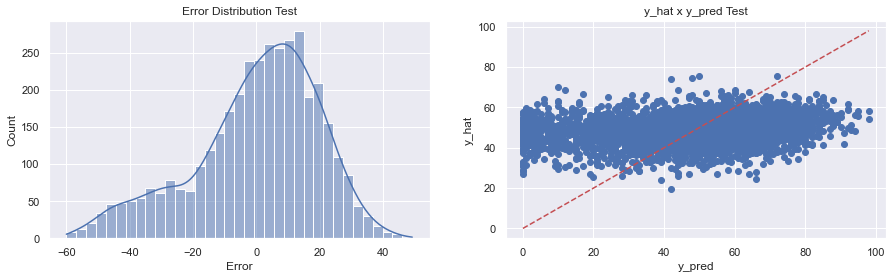

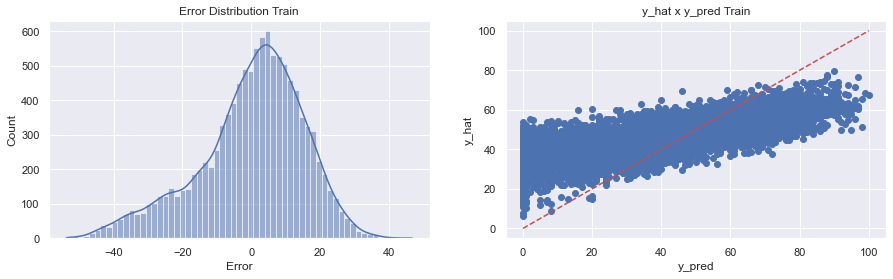

In [254]:
model_dict = {"LinearRegression" : LinearRegression(), "LogisticRegression":LogisticRegression(max_iter=500), 
              "BayesianRidge" : BayesianRidge(), "ElasticNet":ElasticNet(), "XGBoost":XGBRegressor(), "GradientBoostingRegressor":GradientBoostingRegressor(),
              "HistGradientBoostingRegressor":HistGradientBoostingRegressor(), "LGBMRegressor":LGBMRegressor(), "CatBoostRegressor":CatBoostRegressor(verbose=False)}
result_train = {}
result_test = {}
for id_name, model in model_dict.items():
    print(f"\033[1m{id_name}\033[0m")
    result = Evaluate(model, X_Train_std, Y_Train.values.ravel(), X_Test_std, Y_Test.values.ravel())
    result_train[id_name] = result[1]
    result_test[id_name] = result[0]    
    



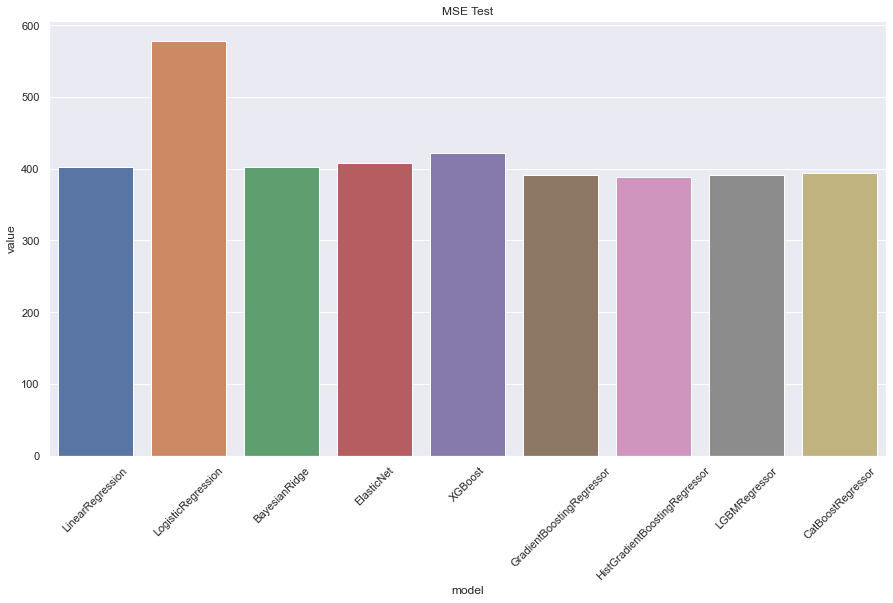

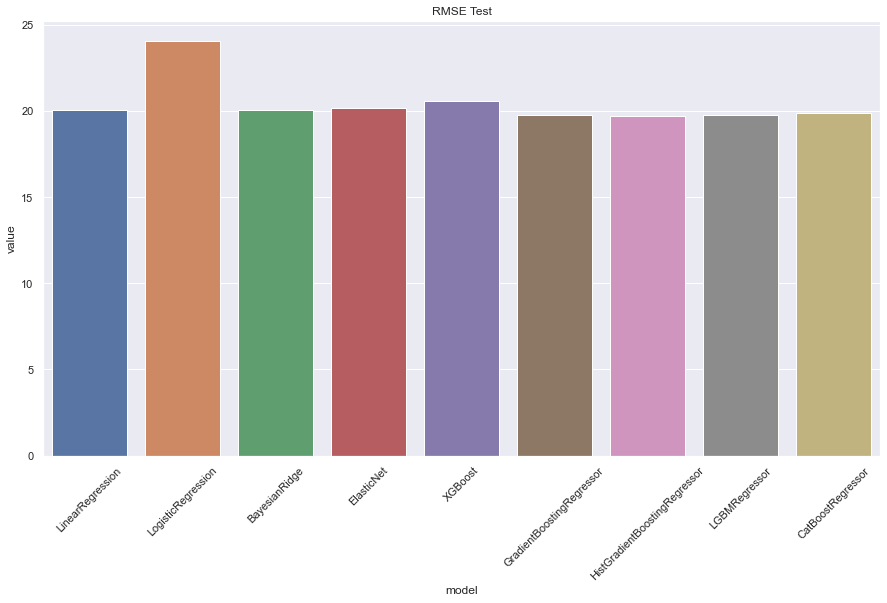

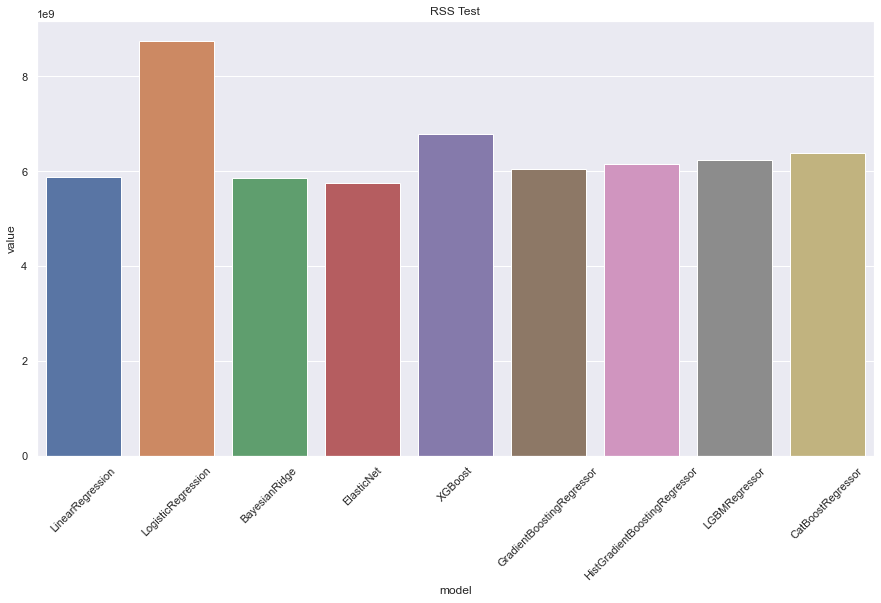

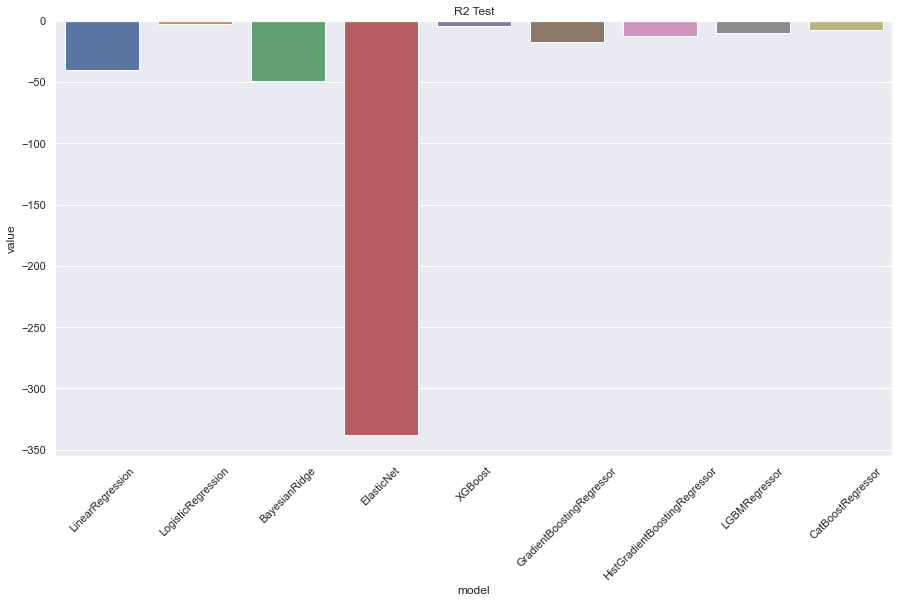

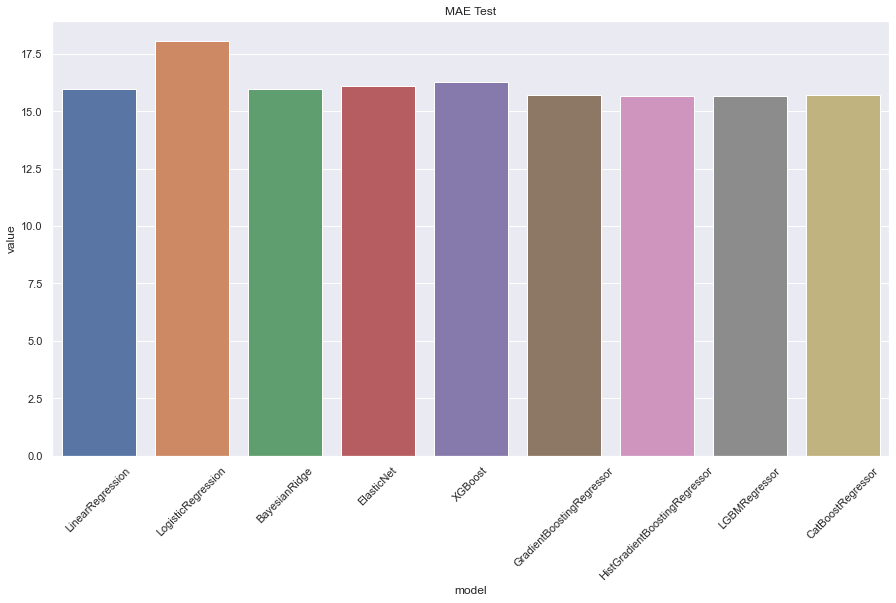

In [255]:
def plotMetrics(data, title):
    metrics_names = ["MSE", "RMSE", "RSS", "R2", "MAE"]

    temp_df = pd.DataFrame(data)
    plt.figure(figsize=(15, 8))
    sns.barplot(data=temp_df, x="model", y="value")
    plt.title(f"{title}")
    plt.xticks(rotation=45)
    plt.show()

metrics_names = ["MSE", "RMSE", "RSS", "R2", "MAE"]

for i in range(len(metrics_names)):
    temp_val = {}
    models_temp = []
    values_temp = []
    for model_name, metrics in result_test.items():
        models_temp.append(model_name)
        values_temp.append(metrics[0][i])
        
    temp_val["value"] = values_temp
    temp_val["model"] = models_temp

    plotMetrics(temp_val, f"{metrics_names[i]} Test")

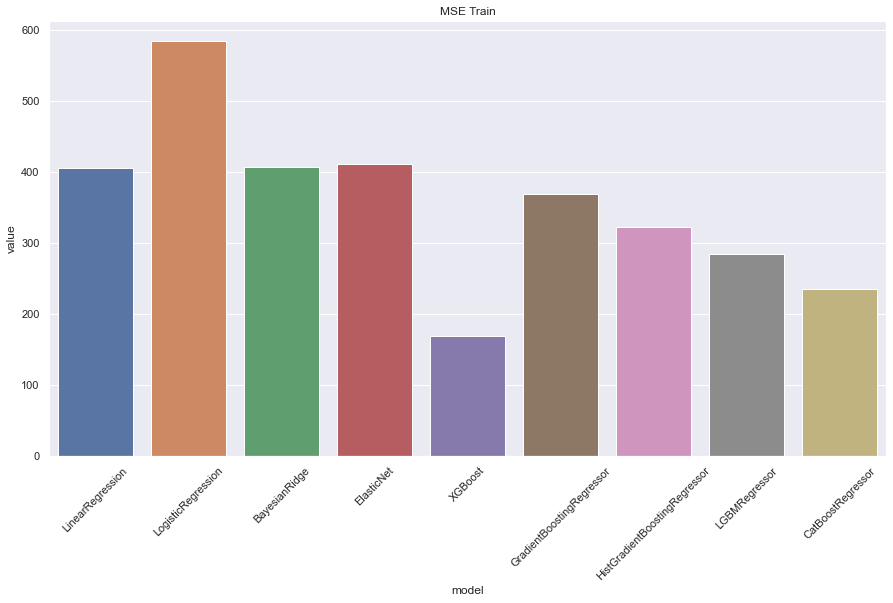

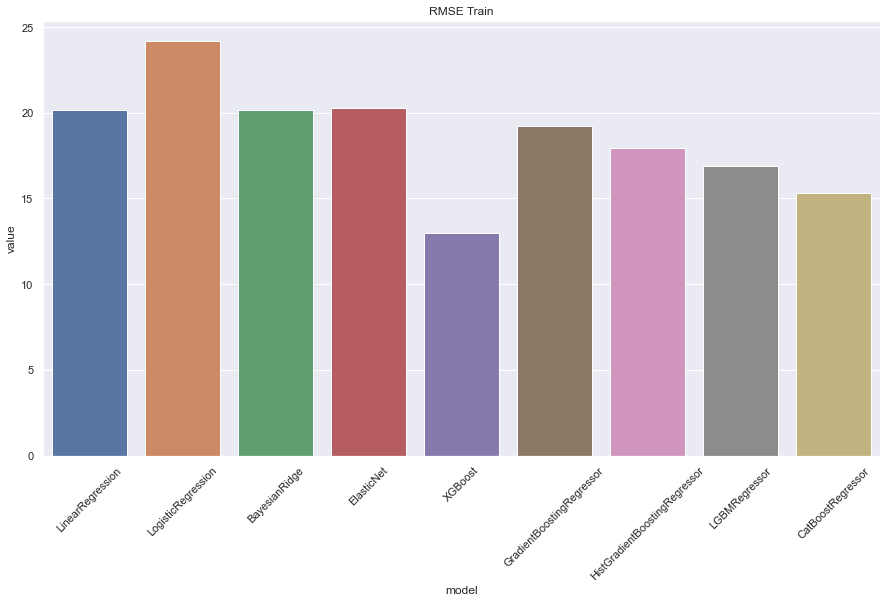

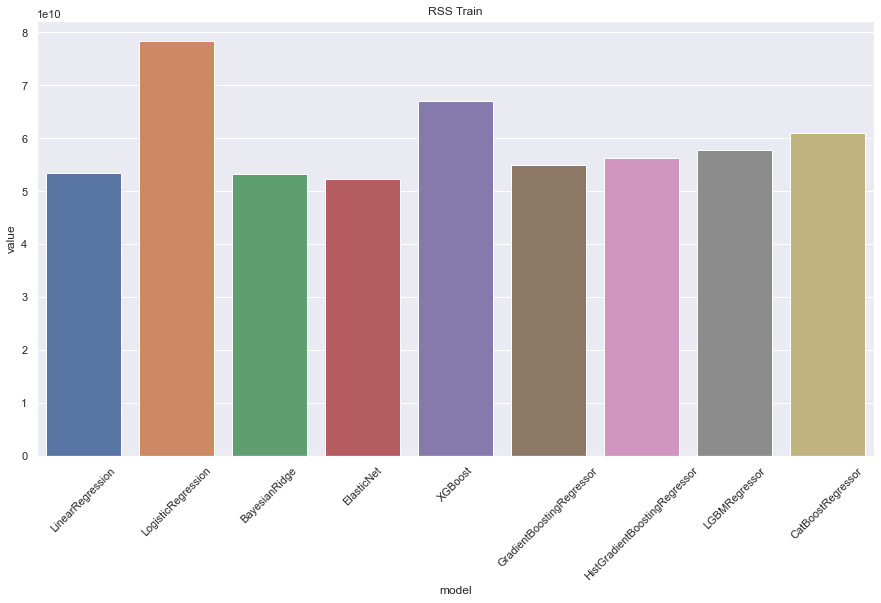

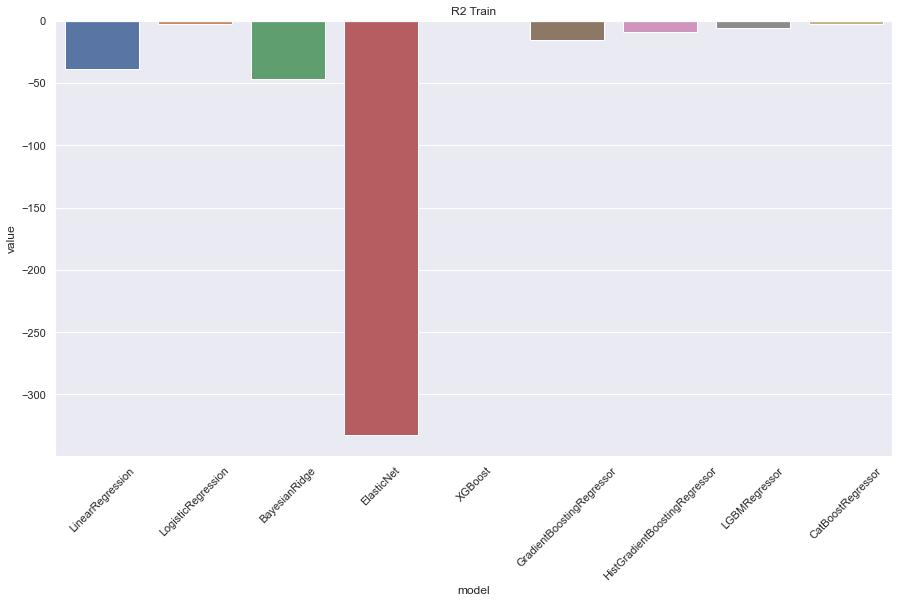

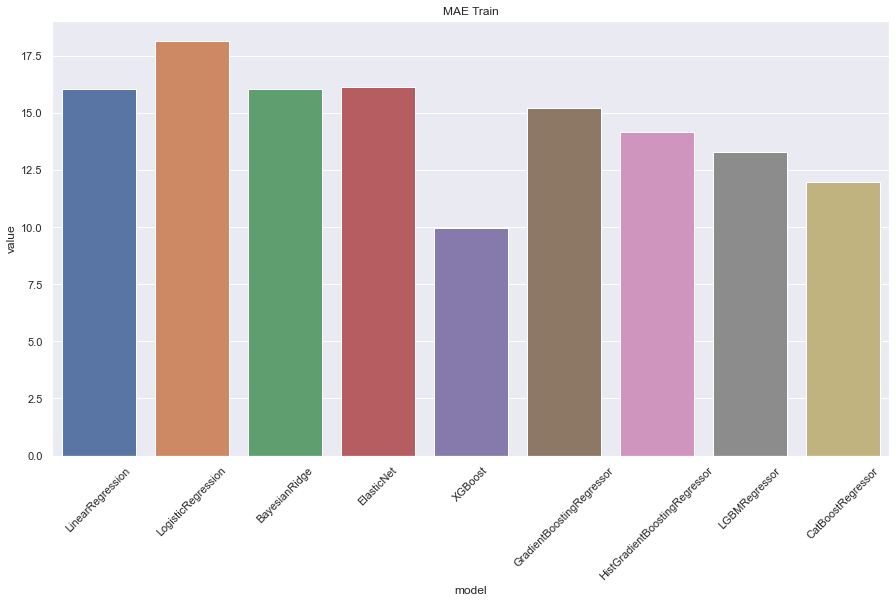

In [256]:
for i in range(len(metrics_names)):
    temp_val = {}
    models_temp = []
    values_temp = []
    for model_name, metrics in result_train.items():
        models_temp.append(model_name)
        values_temp.append(metrics[0][i])
        
    temp_val["value"] = values_temp
    temp_val["model"] = models_temp

    plotMetrics(temp_val, f"{metrics_names[i]} Train")